# Figure generation for all parameters
This Jupyter notebook generates figures to show the coverage for each parameter.

## The data
We start by loading the CSV file into a pandas DataFrame.

In [1]:
import pandas as pd

file = 'data/evaluations.csv'
conversion_dict = {'research_type': lambda x: int(x == 'E')}
evaluation_data = pd.read_csv(file, sep=',', header=0, index_col=0, converters=conversion_dict)

print('Samples per conference\n{}\n'.format(evaluation_data.groupby('conference').size()))
experimental_data = evaluation_data[evaluation_data.research_type == 1]
print('Experimental papers per conference\n{}'.format(experimental_data.groupby('conference').size()))

Samples per conference
conference
AAAI 14     100
AAAI 16     100
IJCAI 13    100
IJCAI 16    100
dtype: int64

Experimental papers per conference
conference
AAAI 14     85
AAAI 16     85
IJCAI 13    71
IJCAI 16    84
dtype: int64


## Generation
We will generate figures for four different categorisations: method, data, and experiment. The categories consist of the following variables: (*method*) problem, objective/goal, research method, research questions, and pseudo code; (*data*) training, validation, test, and results data; (*experiment*) hypothesis, prediction, method source code, hardware specification, software dependencies, experiment setup, experiment source code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')
%matplotlib notebook

colors = matplotlib.cm.get_cmap().colors
len_colors = len(colors)

def plot_bars(data, keys, elements, filename, figsize=(4,4)):
    plot_scores = []
    for (key, element) in zip(keys, elements):
        plot_scores.append(data[element].mean(axis=0))
    
    fig = plt.figure(figsize=figsize)
    ax = plt.subplot(111)
    
    N = len(plot_scores)
    ind = np.arange(N)
    width = 0.7
    
    plot_colors = colors[0:len_colors:int(len_colors/N)]
    ax.bar(ind+0.5, plot_scores, width, align='center',
            alpha=0.5, color=plot_colors)
    for x, y in zip(ind, plot_scores):
        ax.text(x+0.5, 0.95, '{0:.0%}'.format(y),
                ha='center', va='top', size=12)
    ax.set_xlim(0,N)
    ax.set_xticks(ind+0.5)
    ax.set_xticklabels(keys, rotation=35)
    
    ax.set_ylim(0, 1.0)
    ax.set_yticks([0.25, 0.50, 0.75, 1.0])
    ax.set_yticklabels(['25%', r'50%', '75%', '100%'],
            fontdict={'horizontalalignment': 'right'})
    plt.tight_layout()
    plt.savefig('figures/{}.png'.format(filename), format='png',
            bbox_inches='tight')

# Data by conference

AAAI 14


<IPython.core.display.Javascript object>


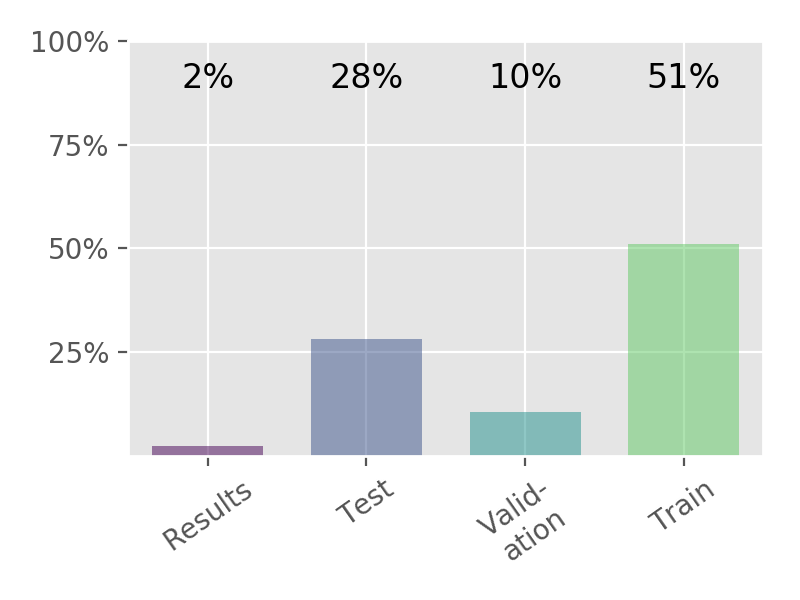

AAAI 16


<IPython.core.display.Javascript object>


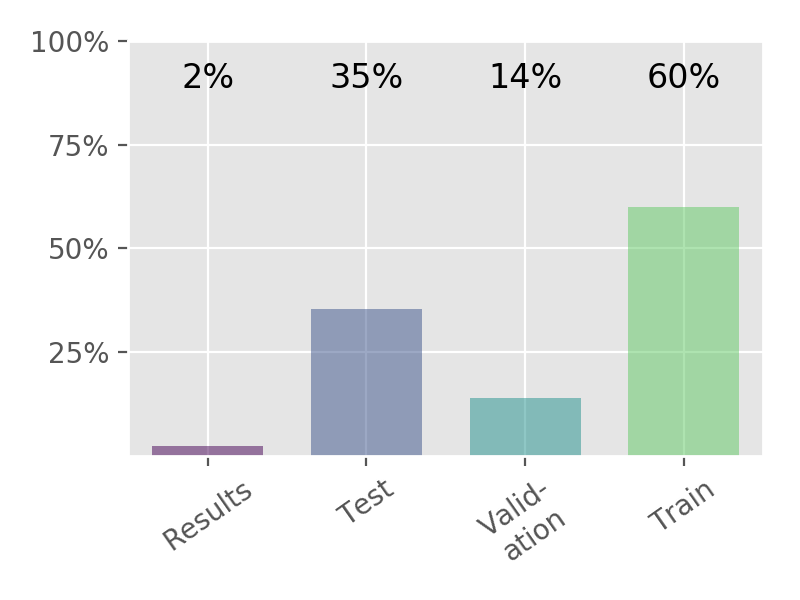

IJCAI 13


<IPython.core.display.Javascript object>


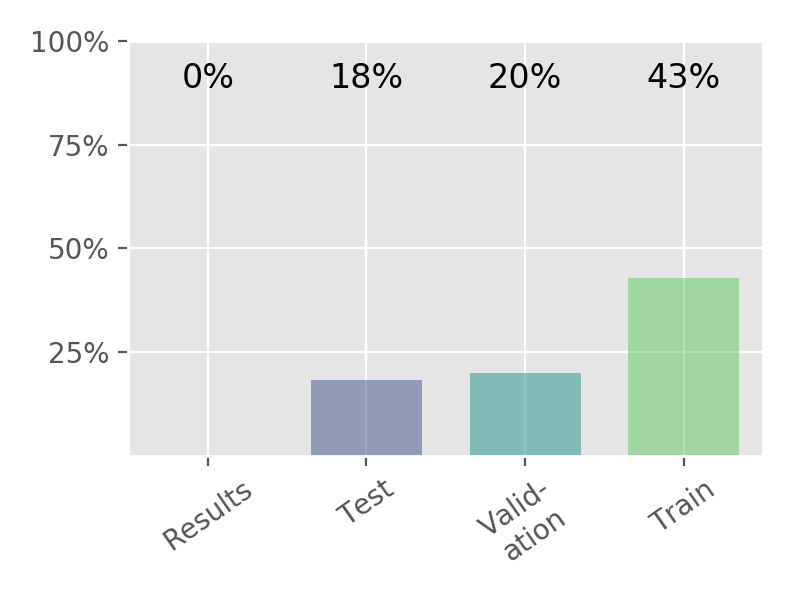

IJCAI 16


<IPython.core.display.Javascript object>


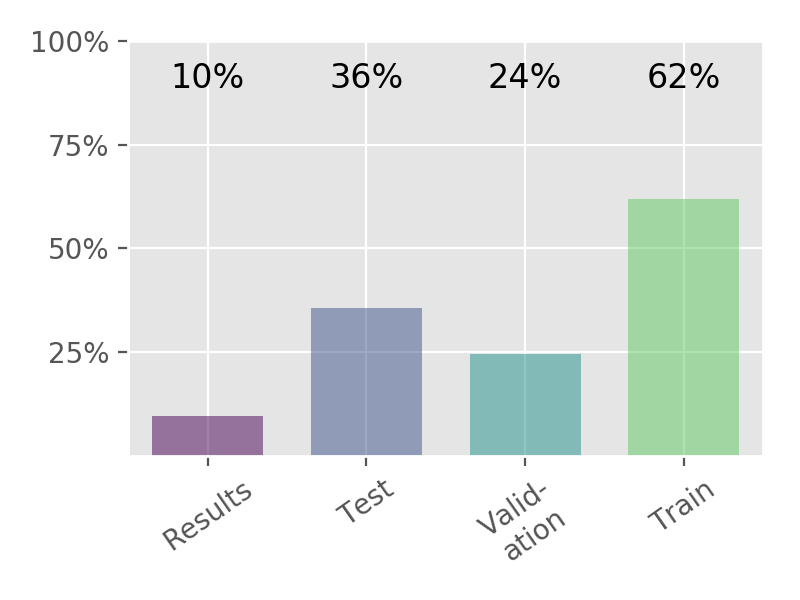

In [3]:
conference_grouped_data = experimental_data.groupby('conference')
keys = ['Results', 'Test', 'Valid-\nation', 'Train']
columns = ['results', 'test', 'validation', 'train']
for conference, conference_data in conference_grouped_data.__iter__():
    print(conference)
    conference = conference.replace(" ", "")
    plot_bars(conference_data[columns], keys, columns,
              '{}_freq_data'.format(conference), figsize=(4,3))

# Method by conference

AAAI 14


<IPython.core.display.Javascript object>


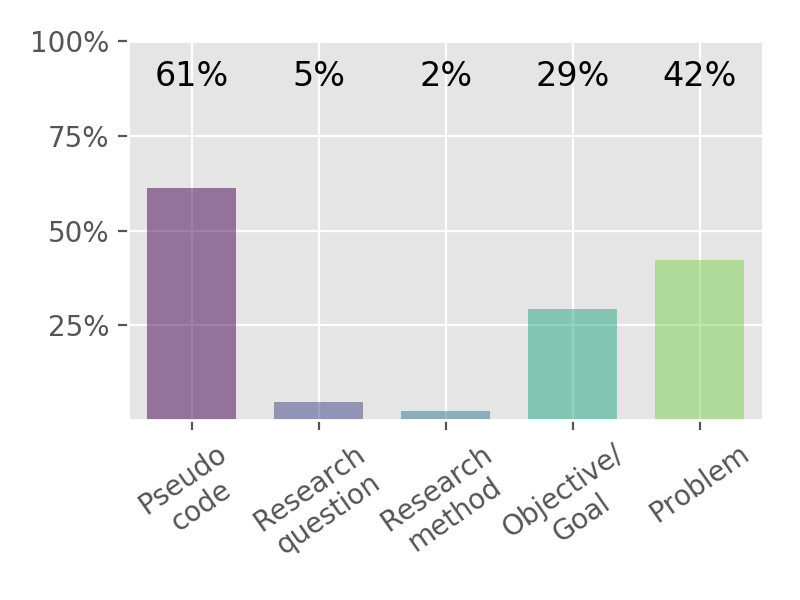

AAAI 16


<IPython.core.display.Javascript object>


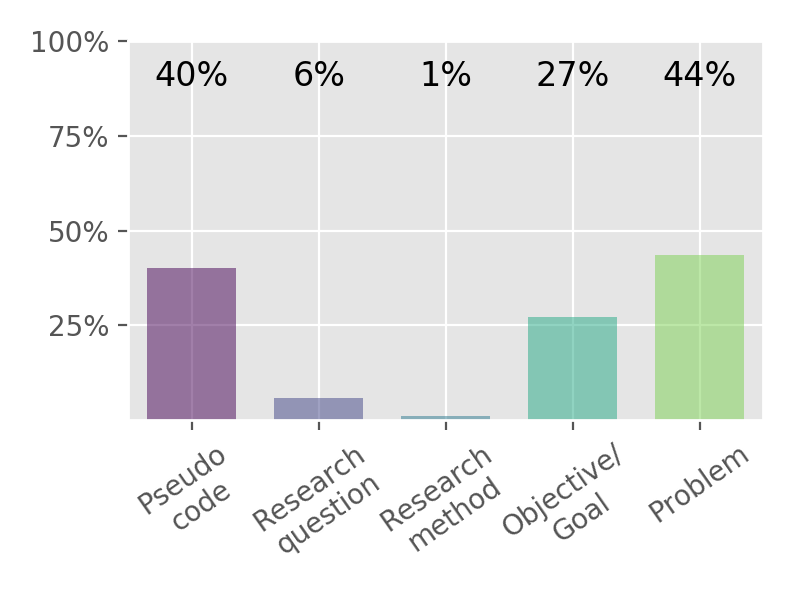

IJCAI 13


<IPython.core.display.Javascript object>


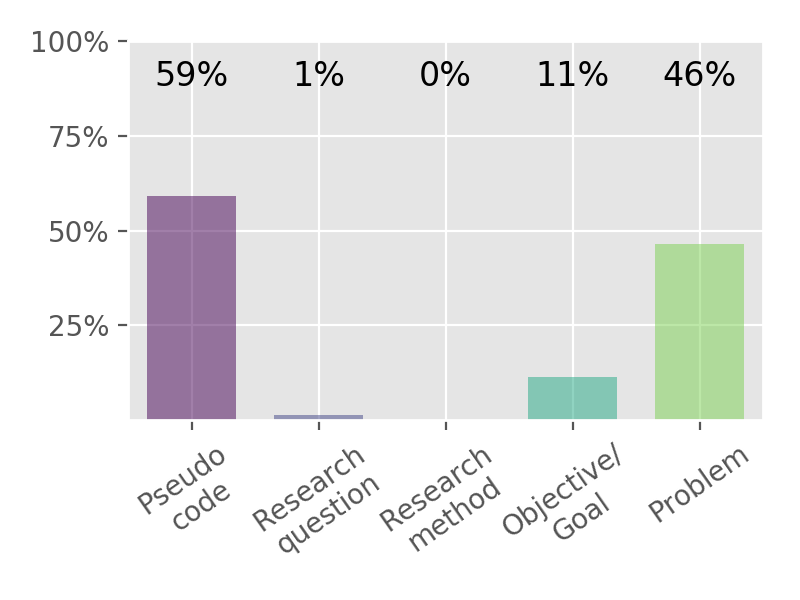

IJCAI 16


<IPython.core.display.Javascript object>


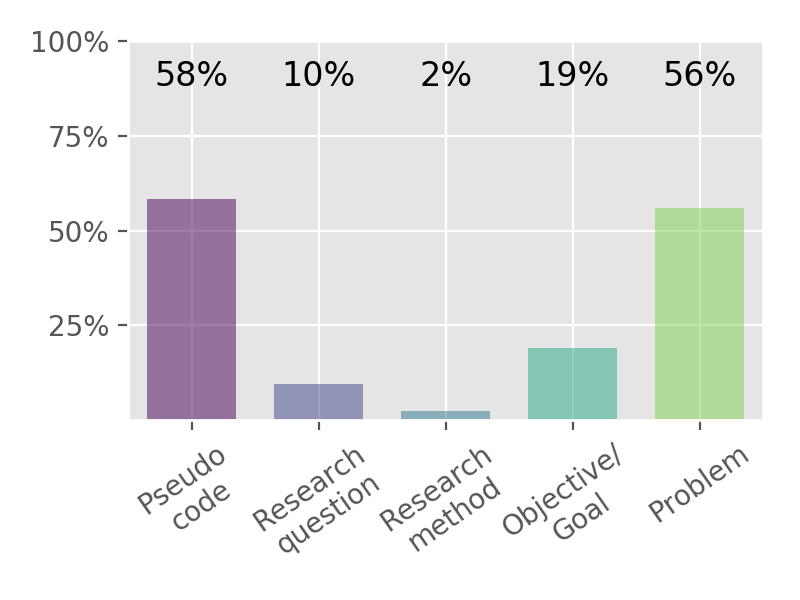

In [4]:
keys = ['Pseudo\ncode', 'Research\nquestion',
        'Research\nmethod', 'Objective/\nGoal', 'Problem']
columns = ['pseudocode', 'research_question',
        'research_method', 'goal/objective', 'problem_description']
for conference, conference_data in conference_grouped_data.__iter__():
    print(conference)
    conference = conference.replace(" ", "")
    plot_bars(conference_data[columns], keys, columns,
              '{}_freq_method'.format(conference), figsize=(4,3))

# Experiment by conference

AAAI 14


<IPython.core.display.Javascript object>


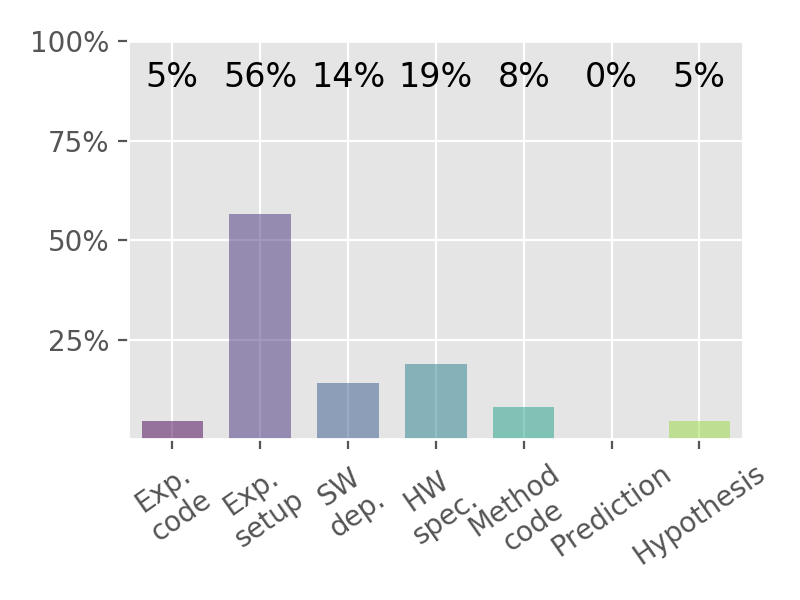

AAAI 16


<IPython.core.display.Javascript object>


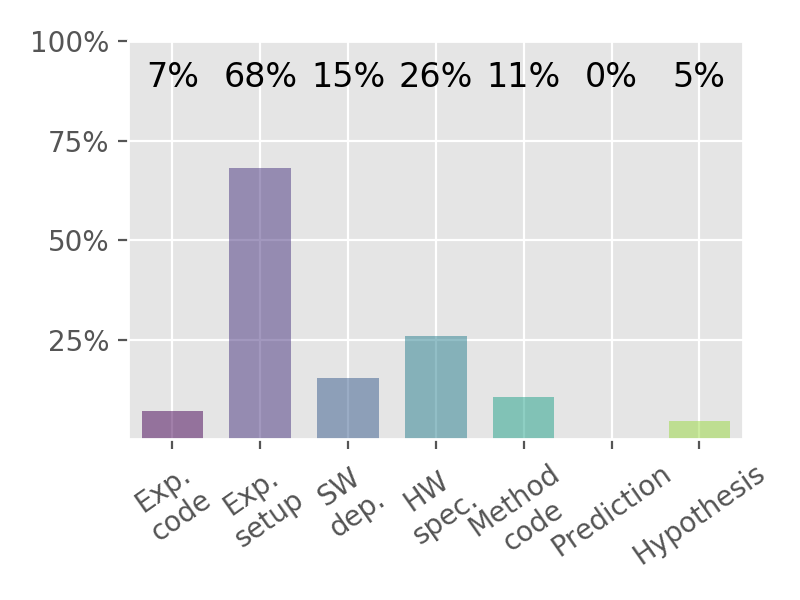

IJCAI 13


<IPython.core.display.Javascript object>


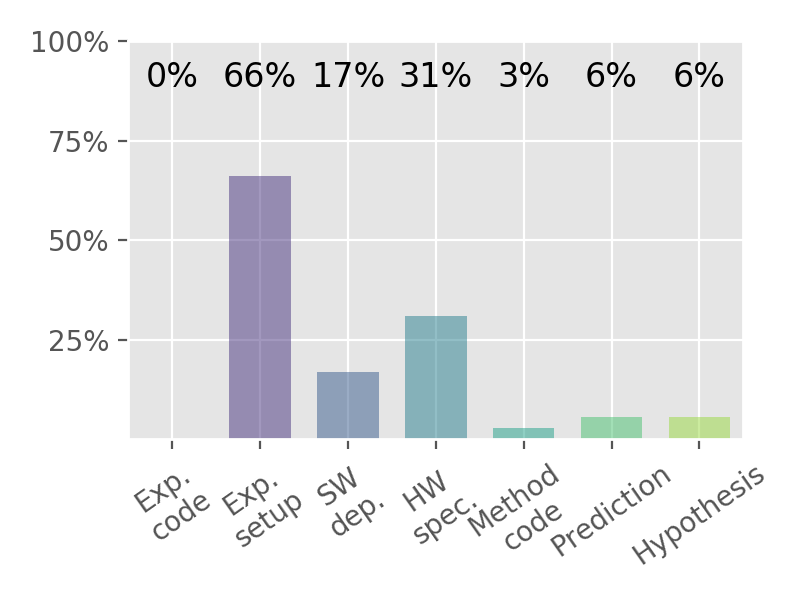

IJCAI 16


<IPython.core.display.Javascript object>


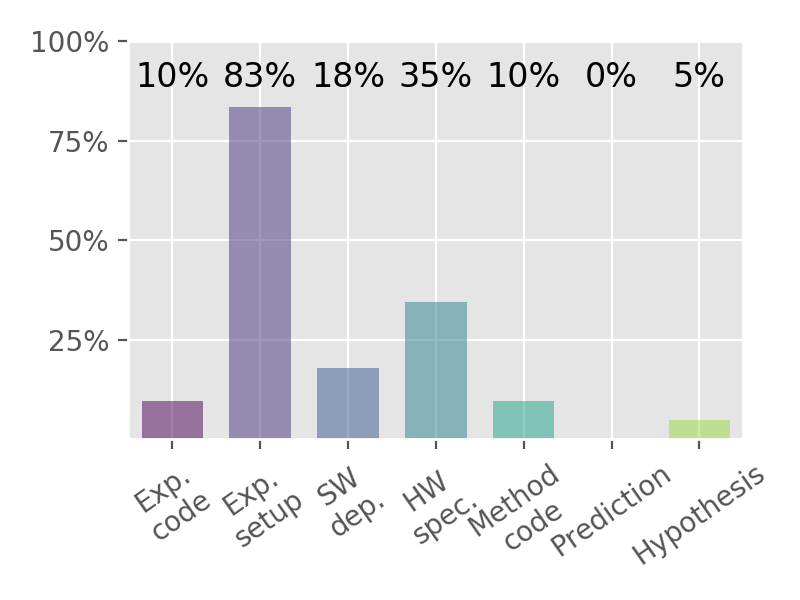

In [5]:
keys = ['Exp.\ncode', 'Exp.\nsetup', 'SW\ndep.',
        'HW\nspec.', 'Method\ncode', 'Prediction', 'Hypothesis']
columns = ['open_experiment_code', 'experiment_setup',
        'software_dependencies', 'hardware_specification',
        'open_source_code', 'prediction', 'hypothesis']
for conference, conference_data in conference_grouped_data.__iter__():
    print(conference)
    conference = conference.replace(" ", "")
    plot_bars(conference_data[columns], keys, columns,
              '{}_freq_experiment'.format(conference), figsize=(4,3))

## Versions

Here's a generated output to keep track of software versions used to run this Jupyter notebook.

In [ ]:
import IPython
import platform

print('Python version: {}'.format(platform.python_version()))
print('IPython version: {}'.format(IPython.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))
print('numpy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))